In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# File from Jas
salData = pd.read_csv('revisedSalaries.csv')

In [3]:
salData.head(5)

,Zip,B19013_001,no_male_hs_p,no_female_hs_p,at_least_hs_male_p,at_least_hs_female_p,at_least_bach_male_p,at_least_bach_female_p,male_unemployment,female_unemployment,...,T51,T53,T99,Place Name,State_y,State Abbreviation,County,Latitude,Longitude,Unnamed: 60
0,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
1,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
2,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
3,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
4,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN


In [4]:
# eliminate rows with missing Y values (NaN)
salData['missingSalary'] = pd.isnull(salData['salary'])
salData2 = salData[(salData.missingSalary == False)]

In [5]:
salData2.head()

,Zip,B19013_001,no_male_hs_p,no_female_hs_p,at_least_hs_male_p,at_least_hs_female_p,at_least_bach_male_p,at_least_bach_female_p,male_unemployment,female_unemployment,...,T53,T99,Place Name,State_y,State Abbreviation,County,Latitude,Longitude,Unnamed: 60,missingSalary
0,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN,False
1,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN,False
2,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN,False
3,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN,False
4,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN,False


In [6]:
salData2.dtypes

Zip                                                                 int64
B19013_001                                                        float64
no_male_hs_p                                                      float64
no_female_hs_p                                                    float64
at_least_hs_male_p                                                float64
at_least_hs_female_p                                              float64
at_least_bach_male_p                                              float64
at_least_bach_female_p                                            float64
male_unemployment                                                 float64
female_unemployment                                               float64
snap                                                              float64
renter                                                            float64
median_rent                                                       float64
foreign_born                          

In [7]:
# list of X vars to include
#put features in a list to deal with them programatically
# X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsInPosition', 
#          'yearsInProfession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instBudget', 'instSize']
# X_numeric = mergedData[X_numeric_features]
# X_categorical_features = ['Function', 'gender', 'race', 'highestDegree', 'Category', 'instType']
# X_categorical = mergedData[X_categorical_features]

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_numeric = salData2.select_dtypes(include=numerics)
X_numeric.drop('salary', axis=1, inplace=True)
X_categorical = salData2.select_dtypes(exclude=numerics)
X_numeric.shape

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1412, 135)

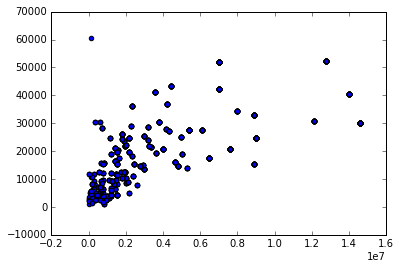

In [8]:
#plt.plot(sal['instBudget'], sal['instSize'])
plt.scatter(salData2['instBudget'], salData2['instSize'])
plt.show()

In [9]:
from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [10]:
X_dummy_features = []
for i in X_categorical.columns:
    temp_dummies = pd.get_dummies(X_categorical[i])
    X_dummy_features.append(temp_dummies)
X_dummy_features = pd.concat(X_dummy_features, axis=1)
# X_dummy_features.shape
X_dummy_features = X_dummy_features.as_matrix()

In [11]:
X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)
X.shape

(1412, 753)

In [12]:
# y is salary
y = salData2.salary.values

In [13]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [15]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)
print(eigen_vals.shape)


Eigenvalues 
[  5.59861796e+01 +0.00000000e+00j   1.82307700e+01 +0.00000000e+00j
   1.44529251e+01 +0.00000000e+00j   1.21943567e+01 +0.00000000e+00j
   1.07674436e+01 +0.00000000e+00j   1.01289481e+01 +0.00000000e+00j
   8.94406617e+00 +0.00000000e+00j   8.84562811e+00 +0.00000000e+00j
   8.68101249e+00 +0.00000000e+00j   8.02809304e+00 +0.00000000e+00j
   7.53822200e+00 +0.00000000e+00j   7.44978685e+00 +0.00000000e+00j
   7.29522001e+00 +0.00000000e+00j   7.18832273e+00 +0.00000000e+00j
   7.01744031e+00 +0.00000000e+00j   6.84341102e+00 +0.00000000e+00j
   6.82543224e+00 +0.00000000e+00j   6.63868580e+00 +0.00000000e+00j
   6.60886882e+00 +0.00000000e+00j   6.52429730e+00 +0.00000000e+00j
   6.50905017e+00 +0.00000000e+00j   6.45990041e+00 +0.00000000e+00j
   6.42397415e+00 +0.00000000e+00j   6.37397239e+00 +0.00000000e+00j
   5.90144977e+00 +0.00000000e+00j   6.33332381e+00 +0.00000000e+00j
   6.28841561e+00 +0.00000000e+00j   6.26570575e+00 +0.00000000e+00j
   6.03756284e+00 +0

In [16]:
np.savetxt('cov.csv', cov_mat, delimiter=',')

In [17]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/patches.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  self._height = float(height)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/patches.py:642: ComplexWarning: Casting complex values to real discards the imaginary part
  self._y = float(xy[1])
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


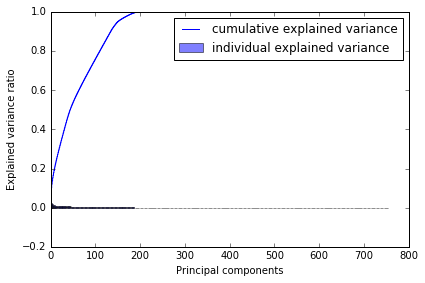

In [18]:
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

In [19]:
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print(pca.explained_variance_ratio_)
print(len(pca.explained_variance_ratio_))

[ 0.07619825  0.02481242  0.0196707   0.01659675  0.01465469  0.01378569
  0.01217304  0.01203907]
8


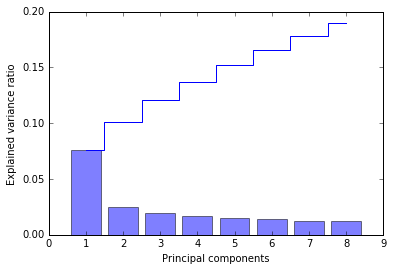

In [20]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [21]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [22]:
from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Mean Squared Error, training data: 57319450
Mean Squared Error, test data: 81629775
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Intercept: 
 50987.7789058
Coefficients: 
 [ -1.30306555e+04  -2.52732653e+04  -2.61683248e+04  -2.46496924e+04
  -2.18756959e+04  -1.65196016e+04  -2.78921866e+04  -2.93763279e+04
  -2.65229158e+04  -2.02299849e+04  -2.38995752e+04  -2.43736807e+04
  -2.77885604e+04  -2.90363421e+04  -2.37306945e+04  -2.23553102e+04
  -2.74231294e+04  -3.02844080e+04  -2.50440250e+04  -2.66543234e+04
   1.34183740e-04  -1.97914705e+04  -2.55969912e+04  -2.11969405e+04
  -2.68093354e+04  -2.46885332e+04  -2.20278022e+04  -2.81397410e+04
  -3.62931278e+03  -4.34563400e+03   5.45491767e+02  -5.45491784e+02
   7.88770406e+02   3.58530747e+03  -1.65190149e+03   3.22977759e+03
  -2.59929679e+03  -1.02799602e+03   1.85659060e+03  -1.61108044e+03
   1.61108044e+03  -3.99082433e+02   3.99082433e+02   6.40798341e+02
   1.62146252e+03   1.07575783e+04   5.87720005e+03  

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


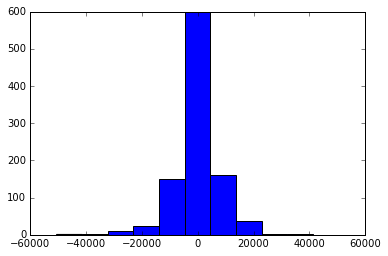

Distribution of prediction error on test data:


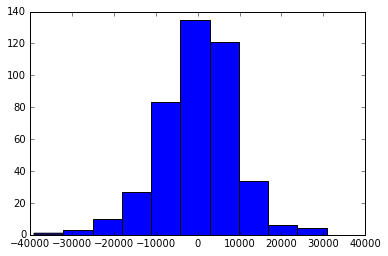

In [23]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The Mean Squared Error
print("Mean Squared Error, training data: %d"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Mean Squared Error, test data: %d"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
print(30 * '* ')
# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_linear'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
print('Variance score, test data: %.2f' % regr.score(X_test, y_test))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

Mean Squared Error, training data: 58311575
Mean Squared Error, test data: 80243320
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Intercept: 
 17798.1238638
Coefficients: 
 [  9.05553678e+03  -2.31314889e+03  -2.92261391e+03  -1.40423257e+03
   1.05082535e+03   6.04143164e+03  -4.79305973e+03  -5.41919224e+03
  -3.21539285e+03   2.07703678e+03  -7.44184695e+02  -1.53115461e+03
  -4.53578115e+03  -5.42863779e+03  -6.39844304e+02   4.94663274e+02
  -3.31554412e+03  -7.18984115e+03  -1.88024591e+03  -3.12538852e+03
   0.00000000e+00   2.87211818e+03  -2.48958418e+03   1.69649279e+03
  -3.57499704e+03  -1.63712496e+03   9.68674222e+02  -4.86386511e+03
  -1.90545913e+03  -2.50680620e+03   4.61025704e+02  -4.61025704e+02
   1.07373498e+02   2.80955274e+03  -1.85468681e+03   2.66396807e+03
  -2.93837017e+03  -6.68101583e+02   1.13152016e+03  -1.81621418e+03
   1.81621418e+03  -1.96790854e+02   1.96790854e+02  -8.30161239e+02
   2.26569322e+02   8.50834522e+03   4.45858088e+03  

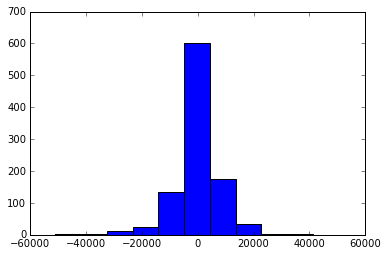

Distribution of prediction error on test data:


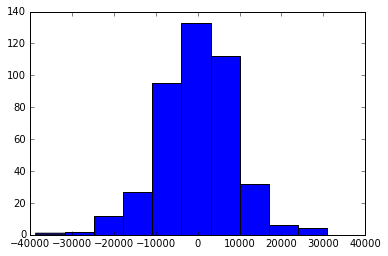

In [24]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.Ridge()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)
# The Mean Squared Error
print("Mean Squared Error, training data: %d"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Mean Squared Error, test data: %d"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
print(30 * '* ')

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
print('Variance score, test data: %.2f' % regr.score(X_test, y_test))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

Mean Squared Error, training data: 74602382
Mean Squared Error, test data: 87764855
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Intercept: 
 33913.9072222
Residual sum of squares, training data: 74602382.70
Residual sum of squares, test data: 87764855.88
Variance score, training data: 0.78
Variance score, test data: 0.73
Distribution of prediction error on training data:


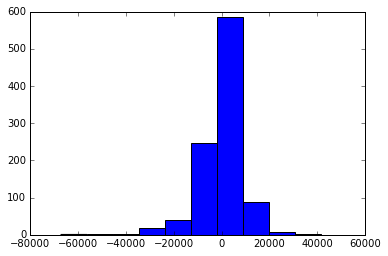

Distribution of prediction error on test data:


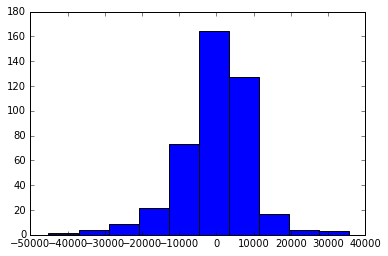

In [25]:
## RIDGE REGRESSION with normalization
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.Ridge(normalize=True)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)
# The Mean Squared Error
print("Mean Squared Error, training data: %d"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Mean Squared Error, test data: %d"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
print(30 * '* ')

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
print('Variance score, test data: %.2f' % regr.score(X_test, y_test))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

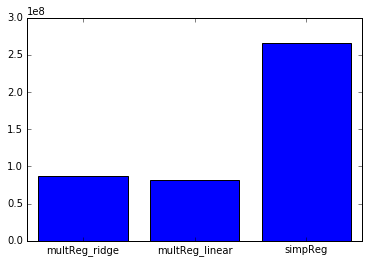

In [26]:
# bar graph of dict with Residual Sum of Squares on test datasets

#var_to_graph['multReg_poly'] = 0
plt.bar(range(len(var_to_graph)), var_to_graph.values(), align='center')
plt.xticks(range(len(var_to_graph)), var_to_graph.keys())

plt.show()